# Importações de modulos necessários

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


# Aquisição dos dados

In [2]:
example_df = pd.read_csv('./data/marketing_campaign.csv', sep='\t')

In [3]:
example_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
example_df.drop(columns='ID')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0


# Preparação dos dados

In [5]:
example_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* Uma prática comum para a criação de um modelo de aprendizado de máquina é normalizar os dados para que as faixas dos dados sejam padronizadas, o quê ajuda o algoritmo de aprendizado a convergir para um solução

In [6]:
df = example_df.dropna()
le = LabelEncoder()
for col in df.select_dtypes(object).columns:
    df[col] = le.fit_transform(df[col])

/var/folders/9b/_8jbbm8153zglqt9ld2v9pbm0000gp/T/ipykernel_3450/2654585524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [7]:
df = df.drop('ID', axis='columns')
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138.0,0,0,80,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344.0,1,1,157,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,5,71613.0,0,0,444,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,5,26646.0,1,0,199,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,3,58293.0,1,0,390,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138.0,0,0,80,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344.0,1,1,157,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,5,71613.0,0,0,444,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,5,26646.0,1,0,199,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,3,58293.0,1,0,390,94,173,43,...,5,0,0,0,0,0,0,3,11,0


### Minmax scaler
Será utilizado o minmax scaler que normaliza os dados de forma que converta o espaço para uma faixa entre 0 e 1

In [9]:
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(data=scaler.fit_transform(df), columns=[x[:x.find('(cm)')] for x in df.columns])
normalized_df.head()

,Year_Birt,Educatio,Marital_Statu,Incom,Kidhom,Teenhom,Dt_Custome,Recenc,MntWine,MntFruit,...,NumWebVisitsMont,AcceptedCmp,AcceptedCmp,AcceptedCmp,AcceptedCmp,AcceptedCmp,Complai,Z_CostContac,Z_Revenu,Respons
0,0.621359,0.5,0.571429,0.084832,0.0,0.0,0.121029,0.585859,0.425318,0.442211,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.592233,0.5,0.571429,0.067095,0.5,0.5,0.237519,0.383838,0.007368,0.005025,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.699029,0.5,0.714286,0.105097,0.0,0.0,0.671710,0.262626,0.285332,0.246231,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.883495,0.5,0.714286,0.037471,0.5,0.0,0.301059,0.262626,0.007368,0.020101,...,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.854369,1.0,0.428571,0.085065,0.5,0.0,0.590015,0.949495,0.115874,0.216080,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Criação do modelo de aprendizado

## Procurando o K ideal

* Para encontrar o k ideal utilizaremos o método do cotovoleo, que encontra um número de cluster a partir de onde os dados deixam de apresentar uma redução significativa da variância dentro de cada cluster

([<matplotlib.axis.XTick at 0x282c2be20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

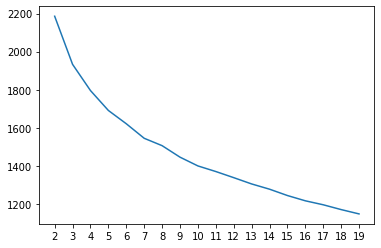

In [10]:
variance_intra_cluster = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_df)
    variance_intra_cluster.append(kmeans.inertia_)

sns.lineplot(x=list(range(2, 20)), y=variance_intra_cluster)
plt.xticks(list(range(2, 20)))

In [11]:
final_df = df.copy()
kmeans = KMeans(n_clusters=8)
final_df['cluster'] = kmeans.fit_predict(normalized_df)

In [12]:
px.scatter_3d(data_frame=final_df, x=0, y=1, z=2, color=final_df['cluster'])

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'cluster'] but received: 0

# Avaliação do modelo

In [26]:
final_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
0,1957,2,4,58138.0,0,0,80,58,635,88,...,0,0,0,0,0,0,3,11,1,6
1,1954,2,4,46344.0,1,1,157,38,11,1,...,0,0,0,0,0,0,3,11,0,4
2,1965,2,5,71613.0,0,0,444,26,426,49,...,0,0,0,0,0,0,3,11,0,2
3,1984,2,5,26646.0,1,0,199,26,11,4,...,0,0,0,0,0,0,3,11,0,1
4,1981,4,3,58293.0,1,0,390,94,173,43,...,0,0,0,0,0,0,3,11,0,4


In [27]:
sns.scatterplot(data=final_df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster')

ValueError: Could not interpret value `sepal length (cm)` for parameter `x`

## Utilização do pca

In [ ]:
pca = PCA()
pca_df = pca.fit_transform(final_df.drop('cluster', axis='columns'))

<AxesSubplot:>

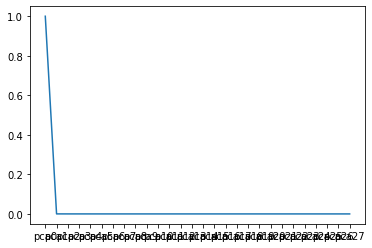

In [ ]:
sns.lineplot(x=pca.get_feature_names_out(), y=pca.explained_variance_ratio_)

In [ ]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [ ]:
pca_df = pd.DataFrame(pca_df)
pca_df.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,5895.320940,-390.807797,-261.435015,241.614459,-76.609931,-43.676936,-18.255539,-11.988424,-0.587162,12.920742,...,0.216518,0.169438,-0.050439,-0.579667,0.069531,0.005165,0.007430,-0.017503,4.112250e-12,1.529937e-12
1,-5906.160097,285.564800,-164.721885,-44.954220,25.562196,-3.574240,-4.574644,8.824086,1.824333,15.639190,...,-0.435337,-0.016409,0.044242,-0.022049,-0.020882,0.000314,0.007508,-0.022341,-6.706940e-14,-9.163877e-13
2,19365.662621,70.883002,124.223245,-112.579674,-44.489274,-44.709874,-42.947229,17.469106,-15.089183,1.367559,...,0.275151,-0.245654,-0.131413,-0.024118,-0.004725,0.025240,0.009480,-0.011645,1.372276e-12,1.595493e-12
3,-25603.205492,99.059415,-133.206429,16.245461,13.925793,-11.847850,-6.498595,21.510680,3.432285,-12.518095,...,-0.064413,-0.166017,0.046631,0.024332,-0.018626,-0.012411,0.005134,-0.009562,-6.839633e-13,4.390569e-13
4,6044.182045,194.586110,68.257077,-10.440005,-2.625787,-28.974673,10.663408,-41.706735,-22.192928,-12.349393,...,0.091333,-0.174789,0.036830,0.025754,-0.009253,0.019137,0.023216,-0.004316,-1.481947e-12,-2.464418e-12


ValueError: Index data must be 1-dimensional

In [ ]:
pca_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5895.320940,-390.807797,-261.435015,241.614459,-76.609931,-43.676936,-18.255539,-11.988424,-0.587162,12.920742,...,0.216518,0.169438,-0.050439,-0.579667,0.069531,0.005165,0.007430,-0.017503,4.112250e-12,1.529937e-12
1,-5906.160097,285.564800,-164.721885,-44.954220,25.562196,-3.574240,-4.574644,8.824086,1.824333,15.639190,...,-0.435337,-0.016409,0.044242,-0.022049,-0.020882,0.000314,0.007508,-0.022341,-6.706940e-14,-9.163877e-13
2,19365.662621,70.883002,124.223245,-112.579674,-44.489274,-44.709874,-42.947229,17.469106,-15.089183,1.367559,...,0.275151,-0.245654,-0.131413,-0.024118,-0.004725,0.025240,0.009480,-0.011645,1.372276e-12,1.595493e-12
3,-25603.205492,99.059415,-133.206429,16.245461,13.925793,-11.847850,-6.498595,21.510680,3.432285,-12.518095,...,-0.064413,-0.166017,0.046631,0.024332,-0.018626,-0.012411,0.005134,-0.009562,-6.839633e-13,4.390569e-13
4,6044.182045,194.586110,68.257077,-10.440005,-2.625787,-28.974673,10.663408,-41.706735,-22.192928,-12.349393,...,0.091333,-0.174789,0.036830,0.025754,-0.009253,0.019137,0.023216,-0.004316,-1.481947e-12,-2.464418e-12


<AxesSubplot:>

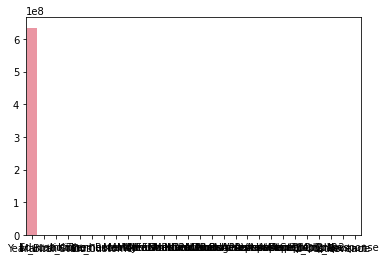

In [ ]:
sns.barplot(y=pca.explained_variance_ratio_, x=pca.feature_names_in_)

In [30]:
from sklearn import preprocessing

data_scaled = pd.DataFrame(preprocessing.scale(df), columns=df.columns)
data_scaled

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,-1.307032,0.310532,0.978226,1.549429,...,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952
1,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.901325,-0.380509,-0.872024,-0.637328,...,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530
2,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,0.610855,-0.795134,0.358511,0.569159,...,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530
3,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.680031,-0.795134,-0.872024,-0.561922,...,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530
4,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,0.326333,1.554407,-0.391671,0.418348,...,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.151917,-0.350527,-0.673866,0.356642,-0.823039,0.909066,-0.295399,-0.104093,1.197646,0.418348,...,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530
2212,-1.904422,1.429011,1.182303,0.467539,2.902916,0.909066,-0.637879,0.241428,0.299208,-0.662463,...,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,0.0,0.0,-0.420530
2213,1.016420,-0.350527,-1.601951,0.188091,-0.823039,-0.928972,1.016561,1.450751,1.787710,0.544024,...,0.280829,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530
2214,-1.069896,0.539242,1.182303,0.675388,-0.823039,0.909066,0.905914,-1.417072,0.364441,0.091591,...,-0.956381,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530


<AxesSubplot:>

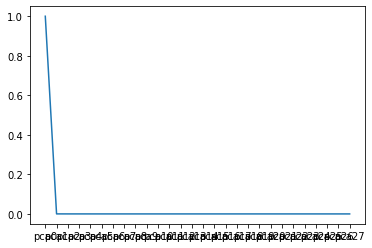

In [39]:
pca = PCA()
pca_df = pca.fit_transform(df)
sns.lineplot(x=pca.get_feature_names_out(), y=pca.explained_variance_ratio_)

In [ ]:
pca = PCA(n_components=5)
pca_df = pca.fit_transform(df)
sns.lineplot(x=pca.get_feature_names_out(), y=pca.explained_variance_ratio_)

In [40]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [41]:
pca_df = pd.DataFrame(pca_df)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,5895.320940,-390.807797,-261.435015,241.614459,-76.609931,-43.676936,-18.255539,-11.988424,-0.587162,12.920742,...,0.216518,0.169438,-0.050439,-0.579667,0.069531,0.005165,0.007430,-0.017503,4.112250e-12,1.529937e-12
1,-5906.160097,285.564800,-164.721885,-44.954220,25.562196,-3.574240,-4.574644,8.824086,1.824333,15.639190,...,-0.435337,-0.016409,0.044242,-0.022049,-0.020882,0.000314,0.007508,-0.022341,-6.706940e-14,-9.163877e-13
2,19365.662621,70.883002,124.223245,-112.579674,-44.489274,-44.709874,-42.947229,17.469106,-15.089183,1.367559,...,0.275151,-0.245654,-0.131413,-0.024118,-0.004725,0.025240,0.009480,-0.011645,1.372276e-12,1.595493e-12
3,-25603.205492,99.059415,-133.206429,16.245461,13.925793,-11.847850,-6.498595,21.510680,3.432285,-12.518095,...,-0.064413,-0.166017,0.046631,0.024332,-0.018626,-0.012411,0.005134,-0.009562,-6.839633e-13,4.390569e-13
4,6044.182045,194.586110,68.257077,-10.440005,-2.625787,-28.974673,10.663408,-41.706735,-22.192928,-12.349393,...,0.091333,-0.174789,0.036830,0.025754,-0.009253,0.019137,0.023216,-0.004316,-1.481947e-12,-2.464418e-12


In [42]:
px.scatter_3d(pca_df, x=0, y=1, z=2)

In [48]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
sns.heatmap(df.corr(), )

<AxesSubplot:xlabel='Income', ylabel='MntMeatProducts'>

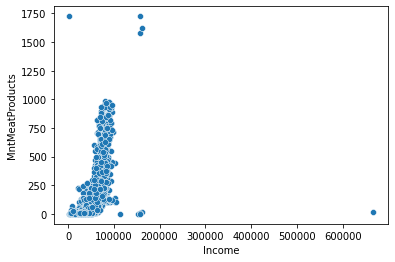

In [49]:
sns.scatterplot(data=df, x='Income', y='MntMeatProducts')

<AxesSubplot:>

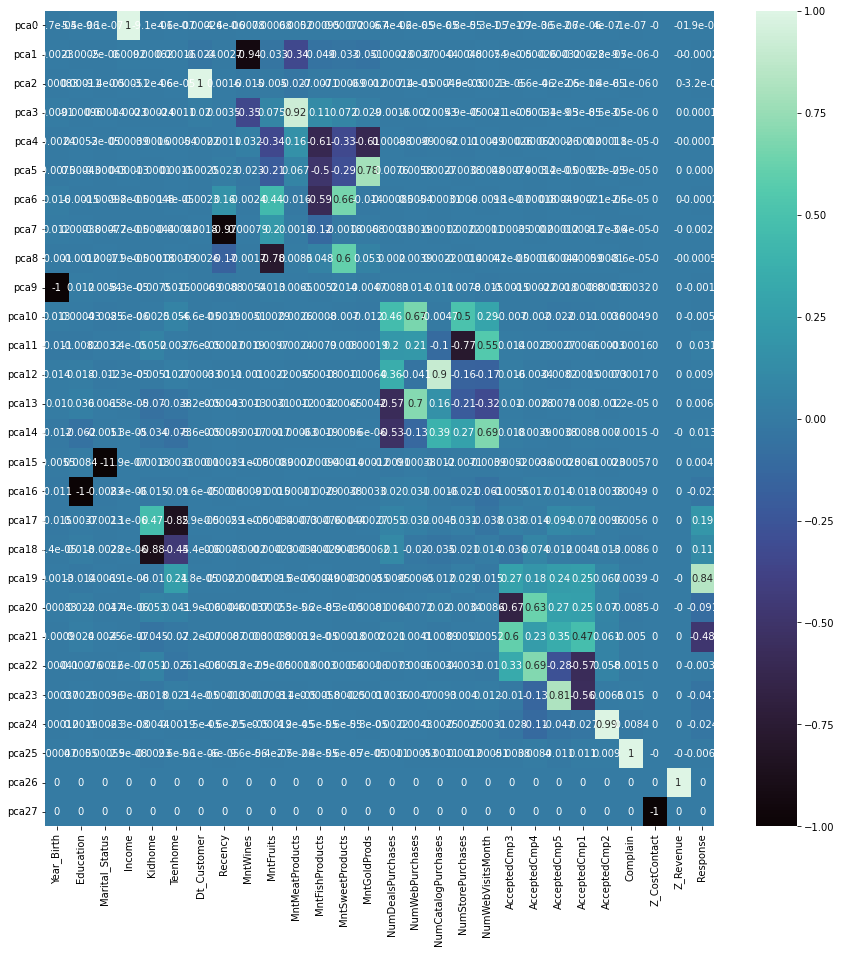

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
sns.heatmap(pd.DataFrame(pca.components_,columns=df.columns,index = pca.get_feature_names_out()), annot=True, cmap='mako')

In [ ]:
pca_dict = dict()
string = ''
for coluna, var, var_ratio in zip(pca.feature_names_in_, pca.explained_variance_, pca.explained_variance_ratio_):
    string += f"'{coluna}' = {' '.join([var, var_ratio])}\n"

In [ ]:
px.scatter_3d(x=pca_df.iloc[0], y=pca_df.iloc[1], z=pca_df.iloc[2])

In [13]:
test_df = pd.read_csv('data/test_data.csv')

In [14]:
test_df.head()

,0,1,2,3
0,1.00,3.0,1.0,0.10
1,2.00,4.0,2.0,0.12
2,1.50,3.0,4.0,0.13
3,0.50,5.0,6.0,0.16
4,0.75,4.5,1.0,0.12


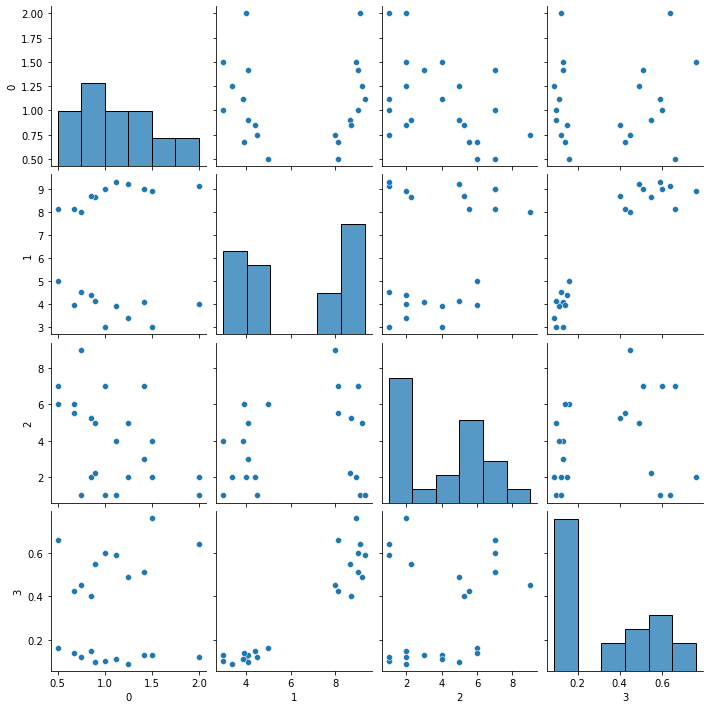

In [15]:
sns.pairplot(test_df)

In [16]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(test_df))

In [17]:
pca_df.head()

,0,1,2,3
0,-4.485957,0.079452,-0.267706,0.047304
1,-3.117103,0.057732,0.789430,-0.045583
2,-2.552747,-2.140335,0.497355,0.076062
3,0.300634,-2.435373,-0.374584,-0.032528
4,-3.340816,1.031598,-0.557376,-0.057857


In [18]:
px.scatter_3d(pca_df, 0, 1, 2)

In [19]:
import random

In [20]:
centros = [[0, 0, 0, 0], [5, 0, 0, 3], [2.5, 2, 1.5, 0]]
columns = [0, 1, 2, 3]
data = []
    
for row in range(250):
    data.append([])
    data[row] = [x + random.gauss(x, 2) for x in centros[random.randint(0, 2)]]


In [23]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(df))

<AxesSubplot:xlabel='0', ylabel='1'>

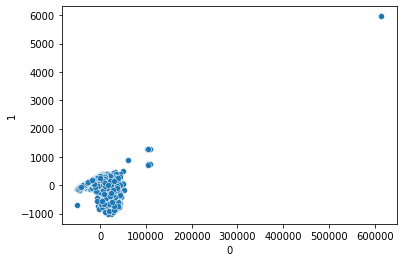

In [24]:
sns.scatterplot(data=pca_df, x=0, y=1)

In [25]:
px.scatter_3d(pca_df, 0, 1, 2)